In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load data
boston_data = datasets.load_boston()

In [3]:
print(boston_data.DESCR)


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
print(boston_df.describe())
boston_df.head()

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# The target -- Median value of owner-occupied homes in $1000's
medv = pd.Series(boston_data.target, name="MEDV")
print(medv.describe())
medv.head()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [38]:
# Split data into training and test sets (30%:70%) -- which is about 152:354
training_X = [[i] for i in boston_df[:153].LSTAT]
testing_X  = [[i] for i in boston_df[153:].LSTAT]

training_y = medv[:153].rename("Training")
testing_y  = medv[153:].rename("Testing")

In [25]:
# Create ordinary least-squares regression model
model = linear_model.LinearRegression()

# Fit data using only LSTAT -- not multiple regression
model.fit(X=training_X, y=training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# The coefficients -- Typically beta in a linear model
print('Coefficient: \n', model.coef_)
# The mean squared error
print("Mean squared error: {0}".format(np.mean((model.predict(testing_X) - testing_y) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(testing_X, testing_y))

Coefficient: 
 [-0.62408382]
Mean squared error: 60.01927431226219
Variance score: 0.44


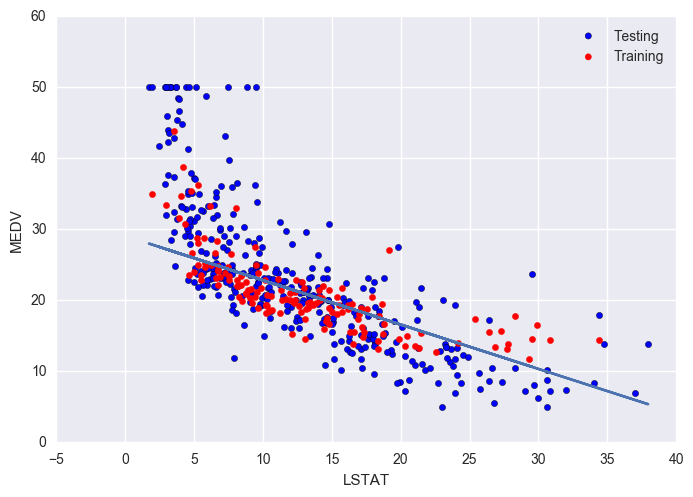

In [27]:
# Plot testing data
plt.scatter(testing_X, testing_y)
# Plot training data
plt.scatter(training_X, training_y, color='red')

# Plot our linear model
plt.plot(testing_X, model.predict(testing_X))
plt.legend()
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

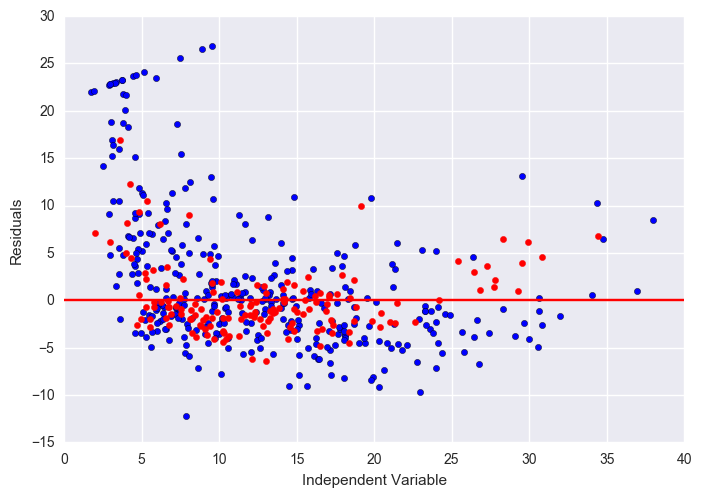

In [29]:
# Plot the residuals -- not all that random (perhaps a linear fit isn't ideal)

plt.close()
plt.scatter(testing_X, ( testing_y - model.predict(testing_X)))
plt.scatter(training_X, ( training_y - model.predict(training_X)), color='red')
plt.hlines(0, xmin=0, xmax=40, colors='red')
plt.xlim(0,40)
plt.ylabel("Residuals")
plt.xlabel("Independent Variable")
plt.show()

# Multiple Regression

In [31]:
# Split data into training and test sets (30%:70%) -- which is about 152:354
training_X = [list(i) for i in boston_df[:153][["LSTAT","CRIM"]].as_matrix()]
testing_X  = [list(i) for i in boston_df[153:][["LSTAT","CRIM"]].as_matrix()]

training_y = medv[:153].rename("Training")
testing_y  = medv[153:].rename("Testing")

In [32]:
# Create ordinary least-squares regression model
model = linear_model.LinearRegression()

# Fit data using CRIM and LSTAT -- not multiple regression
model.fit(X=training_X, y=training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# The coefficients -- Typically betas in a linear model
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: {0}".format(np.mean((model.predict(testing_X) - testing_y) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(testing_X, testing_y))

Coefficients: 
 [-0.59786793 -0.41162871]
Mean squared error: 70.44042808349083
Variance score: 0.34


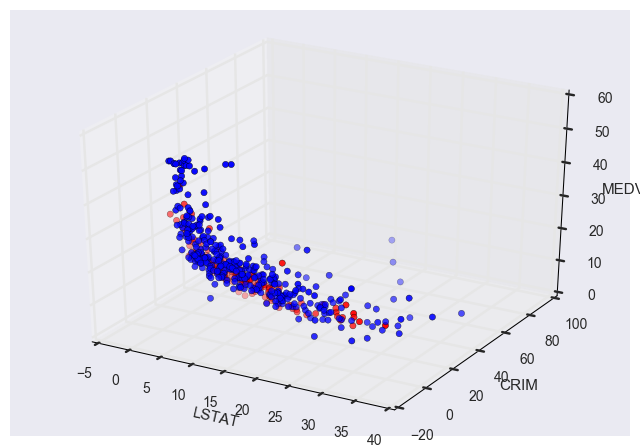

In [34]:
# Make a 3D plot
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=boston_df[:153].LSTAT, ys=boston_df[:153].CRIM, zs=training_y, c='red')
ax.scatter(xs=[i[0] for i in testing_X], ys=[i[1] for i in testing_X], zs=testing_y, c='blue')
#ax.plot(xs=[i[0] for i in testing_X], ys=[i[1] for i in testing_X], zs=model.predict(testing_X))

ax.set_xlabel('LSTAT')
ax.set_ylabel('CRIM')
ax.set_zlabel('MEDV')

plt.show()

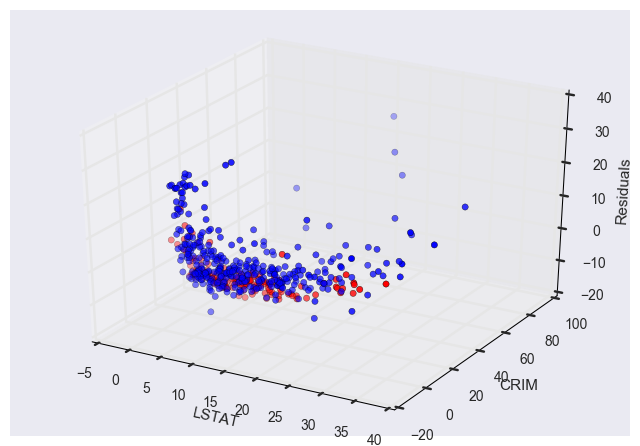

In [35]:
# Plot residuals -- also not all that random

plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=boston_df[:153].LSTAT, ys=boston_df[:153].CRIM, zs=(training_y - model.predict(training_X)), c='red')
ax.scatter(xs=[i[0] for i in testing_X], ys=[i[1] for i in testing_X], zs=(testing_y - model.predict(testing_X)), c='blue')

ax.set_xlabel('LSTAT')
ax.set_ylabel('CRIM')
ax.set_zlabel('Residuals')

plt.show()

# Principal component analysis

In [6]:
# The goal of PCA is to summarize the correlations among a set 
# of observed variables with a smaller set of linear combinations
from sklearn.decomposition import PCA

In [7]:
# Use all Boston data
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
pca = PCA(n_components=2)
pca.fit(boston_df.corr())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# Variance explained
print("Variance explained: ")
print(pca.explained_variance_)
# First PC explains 80% of variation, second explains 16%
# So, most of the data can be explained using only 2 dimensions
# meaning that many of the samples can be described using only 
# a few linear combinations
print(pca.explained_variance_ratio_)
print("")

# Components
print("Components: ")
print(pca.components_)

Variance explained: 
[ 2.41631448  0.15632211]
[ 0.84851541  0.05489423]

Components: 
[[-0.23448593  0.28193943 -0.34464644  0.01524816 -0.34201702  0.20727565
  -0.31376077  0.33414434 -0.30088711 -0.3213694  -0.19805359  0.21605808
  -0.3110596 ]
 [-0.28762903 -0.27887475  0.1101922   0.50154973  0.22525794  0.20892236
   0.30778574 -0.33959863 -0.23781208 -0.21250297 -0.32423375  0.23410569
  -0.09853872]]


In [11]:
transformed_matrix = pca.fit_transform(boston_df)
transformed_df = pd.DataFrame(transformed_matrix)
transformed_df.columns = ["PC1","PC2"]
transformed_df.head()

,PC1,PC2
0,-119.818213,-5.560724
1,-168.889931,10.114197
2,-169.311506,14.078554
3,-190.230599,18.299933
4,-190.133403,16.095371


In [15]:
?pca.fit_transform

In [12]:
# Should be zero if PCs are truly orthogonal -- not here probably due to rounding errors
transformed_df.PC1.dot(transformed_df.PC2)

-4.3655745685100555e-10

In [13]:
PC1_transform = transformed_df.PC1.dot(boston_df)
PC2_transform = transformed_df.PC2.dot(boston_df)

print(PC1_transform)
print("")
print(PC2_transform)

CRIM       4.536147e+05
ZN        -6.799716e+05
INDUS      4.419440e+05
CHAS      -8.670574e+02
NOX        7.015337e+03
RM        -1.822261e+04
AGE        1.304625e+06
DIS       -1.023570e+05
RAD        7.020523e+05
TAX        1.481533e+07
PTRATIO    8.735800e+04
B         -4.542723e+06
LSTAT      3.578988e+05
Name: PC1, dtype: float64

CRIM       1.879183e+04
ZN         3.707322e+03
INDUS     -1.562037e+04
CHAS      -3.240751e+02
NOX        5.778886e+00
RM         1.154428e+03
AGE       -1.805904e+04
DIS        1.116142e+03
RAD       -2.720243e+04
TAX       -9.228680e+05
PTRATIO   -7.982191e+03
B         -3.018117e+06
LSTAT      1.820290e+04
Name: PC2, dtype: float64


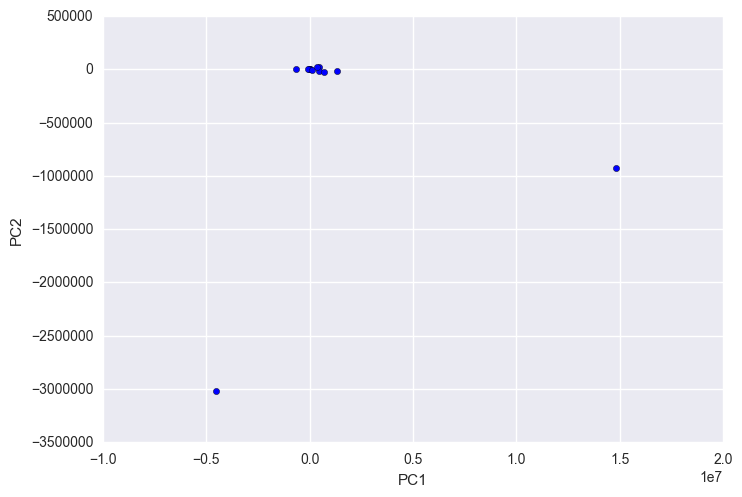

In [14]:
plt.close()
plt.scatter(PC1_transform, PC2_transform)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# The outliers are TAX and B -- 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# The purpose of this is to demonstrate that this matrix has substantial collinearity as much
# of the variance in the data is due to two or three variables, and most of the samples group
# together and are, therefore, strongly collinear